# *Heart Attack Data Analysis.*

### *Hey y'all !*
#### This notebook comprises of exploring, visualizing and gaining insights from the data provided. So, let's get started !

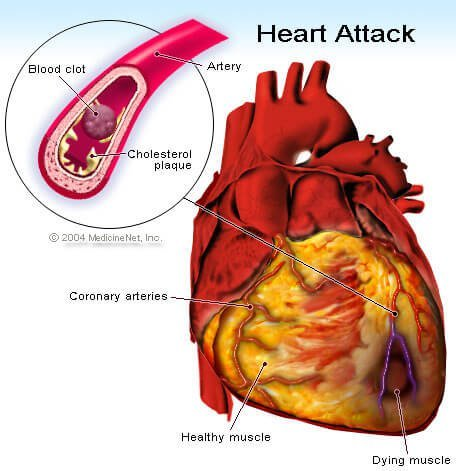

# *Introduction* 🎃

Let's first have an overview of heart attack, like what happens on technical grounds when people unfortunately seem to have it? This can be useful in making decisions later! 


### What is Heart Attack? 
 A heart attack occurs when the **flow of blood to the heart is blocked.** 

 The blockage is most often a buildup of fat, cholesterol and other substances, which form a **plaque in the arteries** that feed the heart.




### Risk Factors. 
Heart attack risk factors include:

**1. *Age.***


Men age 45 or older and women age 55 or older are more likely to have a heart attack than are younger men and women.

**2. *High blood pressure.***

Over time, high blood pressure can damage arteries that lead to your heart. High blood pressure that occurs with other conditions, such as obesity, high cholesterol or diabetes, increases your risk even more.

**3. *High blood cholesterol or triglyceride levels.***

A high level of low-density lipoprotein (LDL) cholesterol ("bad" cholesterol) is most likely to narrow arteries. A high level of triglycerides, a type of blood fat related to your diet, also increases your risk of a heart attack. However, a high level of high-density lipoprotein (HDL) cholesterol ("good" cholesterol) may lower your risk.

**4. *Obesity.***

Obesity is linked with high blood cholesterol levels, high triglyceride levels, high blood pressure and diabetes. Losing just 10% of your body weight can lower this risk.

**5. *Diabetes.***

Not producing enough of a hormone secreted by your pancreas (insulin) or not responding to insulin properly causes your body's blood sugar levels to rise, increasing your risk of a heart attack.

**6. *Metabolic syndrome.***

This syndrome occurs when you have obesity, high blood pressure and high blood sugar. Having metabolic syndrome makes you twice as likely to develop heart disease than if you don't have it.

**7. *Family history of heart attacks.***

If your siblings, parents or grandparents have had early heart attacks (by age 55 for males and by age 65 for females), you might be at increased risk.

**8. *Lack of physical activity.***

Being inactive contributes to high blood cholesterol levels and obesity. People who exercise regularly have better heart health, including lower blood pressure.


### Symptoms. 
Common heart attack signs and symptoms include:

**1. Pressure, tightness, pain, or a squeezing or aching sensation in your chest or arms that may spread to your neck, jaw or back**

*2. Nausea, indigestion, heartburn or abdominal pain*

**3. Shortness of breath**

*4. Cold sweat*

**5. Fatigue**

*6. Lightheadedness or sudden dizziness*

## *Oui Oui, that's seem to be enough info about heart attack for now !* 
Let's now dive into real analysis work !

# Problem Statement. 🎃

#### Know the data.
This is a **classification problem**. We're provided with data; goal is to discover which factors affect the attack most, more and much enough, for that we need to **explore** our data first.
####  Visualization and Analysis.
Based on our knowledge of heart attack so far we will be making **hypotheses** and then we will **test** them by performing EDA.
####  Conclusion.
Based on our **EDA observations** we will decide on some conclusions which will help us **build our model** later.

# Know the Data. 🎃

### Dataset Information:

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type

 Value 1: typical angina
 
 Value 2: atypical angina
 
 Value 3: non-anginal pain
 
 Value 4: asymptomatic
 
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results

 Value 0: normal
 
 Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 
 Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 
* thalach : maximum heart rate achieved
* target : 0 = less chance of heart attack: 1 = more chance of heart attack

In [ ]:
# importing important libraries.

# data pre-processing
import pandas as pd 
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# additional
import warnings
warnings.filterwarnings("ignore")


In [ ]:
heart_df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [ ]:
heart_df.head()

In [ ]:
heart_df.tail()

#### Note: 
* All columns have numerical entries and no string entry.
* There are 303 entries; data is not that big.

In [ ]:
heart_df.shape

In [ ]:
heart_df.info()

#### Note:
* 1 column has float values, 13 have integer values.
* Each 14 columns have 303 non-null entries.


In [ ]:
heart_df.describe()

In [ ]:
heart_df.nunique()

In [ ]:
heart_df.duplicated().sum()

In [ ]:
heart_df.drop_duplicates(inplace=True)

In [ ]:
heart_df.isnull().sum()

#### Note:
* No null (missing) value found.
* One duplicate row found and dropped.
* Many columns seem to have categorical values.


### Comment:
It seems to be clean data already as it has no null values but it is not very big data but one good thing about the data is that it already has numerical enteries.

# Visualization and Analysis 🎃

Let's proceed by making **hypothesis** based on our **knowledge of heart attack** and later **test and analyse** them.

In [ ]:
# H1 : Men age 45 or older and women age 55 or older are more likely to have a heart attack than are younger men and women.

#### H1 testing-

In [ ]:
plt.figure(figsize=(16,6))
sns.histplot(heart_df['age'],kde =False ,bins=40)


In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='age',data=heart_df)

#### Note: 
* Maximum data is of people of age group 40-65. 
* Histogram is a little left-skewed.

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='age',data=heart_df, hue='sex')

#### Note:
* Given data is not uniform neither for 'age' nor for 'sex'.
* Thus,'age' or 'sex' vs 'output' can't be directly ploted to test H1. 
* Create seperate column for 'sex' 0 and 1 using **GroupBy**. 

In [ ]:
heart_attack = heart_df[['sex','output']].groupby('sex').mean().sort_values('output')

In [ ]:
heart_attack

#### Note:
* **Sex 0** is likely to have heartattack **75 % of the times** whereas **sex 1** is only gonna have it **44.9275% of the times**.
* This is good to know but originally we were trying to find **relation between heartattack and age**. Let's try another approach.

In [ ]:
age_group=heart_df[['age','output']].groupby('age').sum()

In [ ]:
age_group

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Age vs chances of Heart Attack")
sns.lineplot(data=age_group)


#### Note:
* People of age group 41 and 54 are more prone to heart attack.
* Middle age group are having heart attack starting from 35 till 65.

In [ ]:
# H2 : Normal trtbps is 80 mm Hg and cholestrol level between 125-200 mg/dL. High blood pressure and cholestrol level increse the chances of heart attack.

#### H2 testing-

In [ ]:
plt.figure(figsize=(16,6))
sns.histplot(heart_df['trtbps'],kde =False ,bins=20)

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(0,200)
plt.xlabel('trtbps')
plt.ylabel('density')
sns.kdeplot(heart_df['trtbps'],shade=True)
plt.show()

#### Note:
* From above two plots, data is more dense about 100-150 which is above normal trtps.
* Density will play role in output count later.

In [ ]:
plt.figure(figsize=(16,6))
sns.swarmplot(heart_df['output'],heart_df['trtbps'])

#### Note:
* Positive heart attack side is more wide spreaded than negative cases even for same trtbps values.
* In the dense data range(high trtbps), positive attack cases are more as compared to negative heart attack cases.


In [ ]:
plt.figure(figsize=(16,6))
sns.histplot(heart_df['chol'],kde =False ,bins=10)

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(0,600)
plt.xlabel('chol')
plt.ylabel('density')
sns.kdeplot(heart_df['chol'],shade=True)
plt.show()

#### Note:
* From above two plots, data is more dense about 150-250 which is above normal trtps.
* Density will play role in output count later.

In [ ]:
plt.figure(figsize=(16,6))
sns.swarmplot(heart_df['output'],heart_df['chol'])

#### Note: 
* Here also positive heart attack is more widespread in dense range of data of high cholestrol values.
* hence, we know high chol and trtbps yield to high chances of getting a heart attack.

# Conclusion- 🎃

#### We have compared and analysed age, sex, high blood pressure and cholestrol for causing heart attack based on which we can say that :
* **Sex 0** is likely to have heartattack **75 % of the times** whereas **sex 1** is only gonna have it **44.9275% of the times**.
* People **above age of 40 are more likely** to get heart attack till 60 age based on given data.
* **High cholestrol** leads to more chances of getting heart attack.
* **High blood pressure** also not good for heart and may cause heart attack.



### Please feel free to correct me or suggest for improvement as I am starting out and it can help me a lot. Thank-you! :)